<a href="https://colab.research.google.com/github/Mayuri-thatikonda/India_house_price_prediction/blob/main/India_house_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv('train.csv')

In [3]:
df.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
0,Owner,0,0,2,BHK,1300.236407,1,1,"Ksfc Layout,Bangalore",12.969910,77.597960,55.0
1,Dealer,0,0,2,BHK,1275.000000,1,1,"Vishweshwara Nagar,Mysore",12.274538,76.644605,51.0
2,Owner,0,0,2,BHK,933.159722,1,1,"Jigani,Bangalore",12.778033,77.632191,43.0
3,Owner,0,1,2,BHK,929.921143,1,1,"Sector-1 Vaishali,Ghaziabad",28.642300,77.344500,62.5
4,Dealer,1,0,2,BHK,999.009247,0,1,"New Town,Kolkata",22.592200,88.484911,60.5


In [4]:
df.dtypes


POSTED_BY                 object
UNDER_CONSTRUCTION         int64
RERA                       int64
BHK_NO.                    int64
BHK_OR_RK                 object
SQUARE_FT                float64
READY_TO_MOVE              int64
RESALE                     int64
ADDRESS                   object
LONGITUDE                float64
LATITUDE                 float64
TARGET(PRICE_IN_LACS)    float64
dtype: object

In [5]:
df['ADDRESS'] = df['ADDRESS'].str.split(',').apply(lambda x: x[-1])
df['ADDRESS'].value_counts(ascending=False).head(25)

Bangalore        4340
Lalitpur         2993
Mumbai           2023
Pune             1991
Noida            1767
Kolkata          1709
Maharashtra      1579
Chennai          1255
Ghaziabad        1087
Jaipur            962
Chandigarh        696
Faridabad         649
Mohali            556
Vadodara          510
Gurgaon           430
Surat             423
Nagpur            336
Lucknow           327
Indore            306
Bhubaneswar       235
Bhopal            218
Kochi             205
Visakhapatnam     179
Bhiwadi           161
Coimbatore        149
Name: ADDRESS, dtype: int64

In [6]:
df.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
0,Owner,0,0,2,BHK,1300.236407,1,1,Bangalore,12.969910,77.597960,55.0
1,Dealer,0,0,2,BHK,1275.000000,1,1,Mysore,12.274538,76.644605,51.0
2,Owner,0,0,2,BHK,933.159722,1,1,Bangalore,12.778033,77.632191,43.0
3,Owner,0,1,2,BHK,929.921143,1,1,Ghaziabad,28.642300,77.344500,62.5
4,Dealer,1,0,2,BHK,999.009247,0,1,Kolkata,22.592200,88.484911,60.5


In [7]:
df.nunique()

POSTED_BY                    3
UNDER_CONSTRUCTION           2
RERA                         2
BHK_NO.                     16
BHK_OR_RK                    2
SQUARE_FT                19561
READY_TO_MOVE                2
RESALE                       2
ADDRESS                    256
LONGITUDE                 4087
LATITUDE                  4078
TARGET(PRICE_IN_LACS)     1172
dtype: int64

In [8]:
df.columns

Index(['POSTED_BY', 'UNDER_CONSTRUCTION', 'RERA', 'BHK_NO.', 'BHK_OR_RK',
       'SQUARE_FT', 'READY_TO_MOVE', 'RESALE', 'ADDRESS', 'LONGITUDE',
       'LATITUDE', 'TARGET(PRICE_IN_LACS)'],
      dtype='object')

In [9]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['ADDRESS'] = le.fit_transform(df['ADDRESS'])


In [10]:
df.tail()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
29446,Owner,0,0,3,BHK,2500.000000,1,1,1,27.140626,78.043277,45.0
29447,Owner,0,0,2,BHK,769.230769,1,1,244,39.945409,-86.150721,16.0
29448,Dealer,0,0,2,BHK,1022.641509,1,1,105,26.928785,75.828002,27.1
29449,Owner,0,0,2,BHK,927.079009,1,1,49,12.900150,80.227910,67.0
29450,Dealer,0,1,2,BHK,896.774194,1,1,105,26.832353,75.841749,27.8


In [11]:
df[['POSTED_BY','BHK_OR_RK']] = df[['POSTED_BY','BHK_OR_RK']].apply(le.fit_transform)
print(df)

       POSTED_BY  UNDER_CONSTRUCTION  ...   LATITUDE  TARGET(PRICE_IN_LACS)
0              2                   0  ...  77.597960                   55.0
1              1                   0  ...  76.644605                   51.0
2              2                   0  ...  77.632191                   43.0
3              2                   0  ...  77.344500                   62.5
4              1                   1  ...  88.484911                   60.5
...          ...                 ...  ...        ...                    ...
29446          2                   0  ...  78.043277                   45.0
29447          2                   0  ... -86.150721                   16.0
29448          1                   0  ...  75.828002                   27.1
29449          2                   0  ...  80.227910                   67.0
29450          1                   0  ...  75.841749                   27.8

[29451 rows x 12 columns]


In [12]:
df.tail()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
29446,2,0,0,3,0,2500.000000,1,1,1,27.140626,78.043277,45.0
29447,2,0,0,2,0,769.230769,1,1,244,39.945409,-86.150721,16.0
29448,1,0,0,2,0,1022.641509,1,1,105,26.928785,75.828002,27.1
29449,2,0,0,2,0,927.079009,1,1,49,12.900150,80.227910,67.0
29450,1,0,1,2,0,896.774194,1,1,105,26.832353,75.841749,27.8


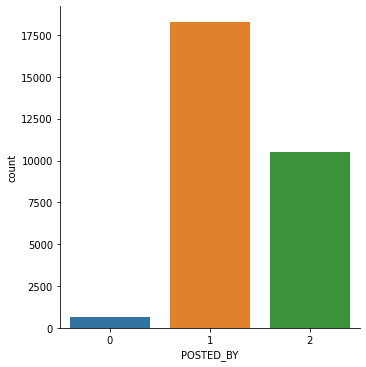

In [13]:
import seaborn as sns
  
sns.catplot(x='POSTED_BY', data=df, kind='count');


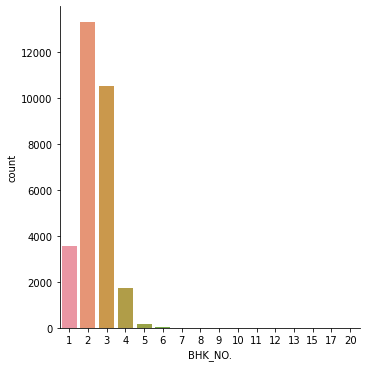

In [14]:
sns.catplot(x='BHK_NO.', data=df, kind='count');

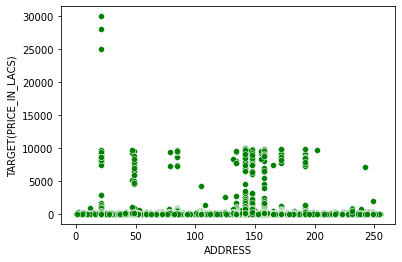

In [15]:
sns.scatterplot(x="ADDRESS",y="TARGET(PRICE_IN_LACS)",data=df,color='green')

In [16]:
df_test = pd.read_csv('test.csv')
df_test.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE
0,Owner,0,0,1,BHK,545.171340,1,1,"Kamrej,Surat",21.262000,73.047700
1,Dealer,1,1,2,BHK,800.000000,0,0,"Panvel,Lalitpur",18.966114,73.148278
2,Dealer,0,0,2,BHK,1257.096513,1,1,"New Town,Kolkata",22.592200,88.484911
3,Dealer,0,0,3,BHK,1400.329489,1,1,"Kalwar Road,Jaipur",26.988300,75.584600
4,Owner,0,0,1,BHK,430.477830,1,1,"Mai Mandir,Nadiad",22.700000,72.870000


In [17]:
df_test['ADDRESS'] = df_test['ADDRESS'].str.split(',').apply(lambda x: x[-1])
df_test['ADDRESS'].value_counts(ascending=False).head(25)

Bangalore        10001
Lalitpur          7070
Pune              4600
Mumbai            4516
Kolkata           4141
Noida             4059
Maharashtra       3679
Chennai           2881
Ghaziabad         2517
Jaipur            2267
Chandigarh        1490
Faridabad         1478
Vadodara          1343
Mohali            1326
Surat             1026
Gurgaon            950
Lucknow            847
Nagpur             799
Indore             662
Kochi              521
Bhubaneswar        461
Bhopal             458
Bhiwadi            437
Goa                424
Visakhapatnam      386
Name: ADDRESS, dtype: int64

In [18]:
df_test[['POSTED_BY','BHK_OR_RK']] = df_test[['POSTED_BY','BHK_OR_RK']].apply(le.fit_transform)
print(df_test)

       POSTED_BY  UNDER_CONSTRUCTION  RERA  ...      ADDRESS  LONGITUDE   LATITUDE
0              2                   0     0  ...        Surat  21.262000  73.047700
1              1                   1     1  ...     Lalitpur  18.966114  73.148278
2              1                   0     0  ...      Kolkata  22.592200  88.484911
3              1                   0     0  ...       Jaipur  26.988300  75.584600
4              2                   0     0  ...       Nadiad  22.700000  72.870000
...          ...                 ...   ...  ...          ...        ...        ...
68715          1                   0     1  ...  Maharashtra  19.180000  72.963330
68716          1                   0     1  ...       Mohali  30.661104  76.746082
68717          1                   1     1  ...  Maharashtra  19.222101  72.988231
68718          1                   0     0  ...         Pune  18.496670  73.941670
68719          1                   0     0  ...       Mumbai  19.124896  72.893503

[68

In [19]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_test['ADDRESS'] = le.fit_transform(df_test['ADDRESS'])


In [20]:
df_test.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE
0,2,0,0,1,0,545.171340,1,1,264,21.262000,73.047700
1,1,1,1,2,0,800.000000,0,0,164,18.966114,73.148278
2,1,0,0,2,0,1257.096513,1,1,157,22.592200,88.484911
3,1,0,0,3,0,1400.329489,1,1,117,26.988300,75.584600
4,2,0,0,1,0,430.477830,1,1,187,22.700000,72.870000


In [21]:
df.shape

(29451, 12)

In [22]:
df_test.shape

(68720, 11)

In [23]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [24]:
df_test_X = df_test.iloc[:, :].values


In [25]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesRegressor
X_train, X_test, y_train, y_test = train_test_split(
       X, y,test_size = 0.2, random_state=0)
reg = ExtraTreesRegressor(n_estimators=100, random_state=0).fit(
       X_train, y_train)

In [26]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

[[477.95 100.  ]
 [ 43.2   36.5 ]
 [ 38.72  80.  ]
 ...
 [ 37.    32.  ]
 [ 28.5   15.  ]
 [ 67.12  67.5 ]]


0.9580019791594516

In [27]:
y_pred = regressor.predict(df_test_X)
print(y_pred)

[  20.74   39.65  154.59 ... 7385.     62.65  621.  ]
